**Table of Content:**

- [Import Libraries](#Import_Libraries)
- [1. Probability disstributions](#1)
- [2. Normal (Gaussian) Distribution](#Normal_Distribution)
  
    - [2.1 Standard Normal Distribution](#2.1)
    - [2.2 Z Score](#2.2)
    - [2.3 Empirical Rule](#2.3)
- [3. Working with normal Distribution](#3)
    - [Detection Outlier using normal distribution](#3.1)

### Import Libraries

In [34]:
import pandas as pd # For performing data operations, cleaning, and descriptive statistics,...
import matplotlib.pyplot as plt # data visualzation 
import seaborn as sns ## data visualization advance features easy to plot than matplotlib
import numpy as np ## For array generation 
from scipy import stats ## For statistical analysis, such as calculating Z-scores
from scipy.stats import norm
import warnings ## To suppress warning messages that could clutter the output

warnings.filterwarnings('ignore')

### 1. Probability disstributions

1. **Discrete random variables** can take a finite, countable number of values. For instance, the result of a dice roll can be 1, 2, 3, 4, 5 or 6.

2. **Continuous random variables** can take an infinite number of values. Examples include measurements such as temperature, height and weight.

### 2. Normal Distribution


A normal distribution is a symmetrical bell-shaped curve, defined by its mean ($\mu$) and standard deviation ($\sigma$)

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\ \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\ \right)\ \quad  x  \in  (- \infty, \infty)$

$f(x) = probability\ density\ function$

$\sigma = standard\ deviation$

$\mu = mean$

#### 2.1 standard normal distribution


Properties of a standard normal distribution:
+ The standard normal distribution is a normal distribution with a mean value of 0 and a standard deviation as 1.
+ Any normal distribution can be converted into standard normal distribution using the following formula:

$$z = \frac {x-\mu}{\sigma}$$  

where $\mu$ and $\sigma$ are the mean and variance of the
original normal distribution.


In [2]:
df = pd.read_csv('data_probability.csv')

In [19]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,"$111,000"
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,"$107,000"
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


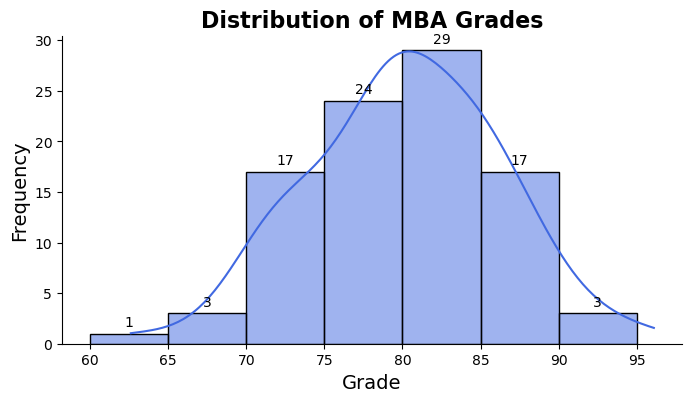

In [31]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.histplot(x=df['MBA Grade'], bins=np.arange(60, 100, 5), 
             kde=True, color='royalblue', edgecolor='black')
ax.set_xticks(np.arange(60, 100, 5))
ax.set_title('Distribution of MBA Grades', fontsize=16, fontweight='bold')
ax.set_xlabel('Grade', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
sns.despine()
# plt.savefig('histogram', dpi = 1000);

In [28]:
df['MBA Grade'].describe()

count    95.000000
mean     80.169474
std       6.170780
min      62.600000
25%      76.050000
50%      80.200000
75%      84.650000
max      96.100000
Name: MBA Grade, dtype: float64

#### 2.2 Z Score

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

#### 2.3 Empirical Rule

<p align="center"> 
  <img width="650" height="350" src="https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png"> 
</p>

##### Instructions

1. **Filter Data Within One Standard Deviation**:
   - Extract the subset of the data that falls within one standard deviation of the mean from ($\mu - \sigma$) to ($\mu + \sigma$).
   - Calculate and report the probability of a data point falling within this range.

2. **Filter Data Within Two Standard Deviations**:
   - Extract the subset of data that falls within two standard deviations of the mean (from ($\mu - 2*\sigma$) to ($\mu + 2*\sigma$).
   - Calculate and report the probability of a data point falling within this range.

3. **Filter Data Within Three Standard Deviations**:
   - Extract the subset of data that falls within three standard deviations of the mean (from ($\mu - 3*\sigma$) to ($\mu + 3*\sigma$).
   - Calculate and report the probability of a data point falling within this range.

**Notes**:
- Ensure that your calculations include only the filtered data points within each specified range.
- Provide both the number of data points and the probability for each range, expressed as a percentage of the total dataset.

**Hints**:
- The probability can be calculated by dividing the count of data points within the specified range by the total count of data points in the dataset.
- Use statistical functions like `mean()` and `std()` to determine the mean and standard deviation values.


### 3. Detection Outlier using normal distribution (empircal rule)

In [40]:
def outlier_detection(df):
    """
    Detect potential outliers in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing numerical data.

    Returns:
    - pandas.Series: A Series containing potential outlier values.
    
    The function calculates the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR).
    It then identifies potential outliers below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).
    The result is a Series containing the values in the DataFrame that are potential outliers.

    Example:
    >>> data = {'Column1': [2, 4, 5, 7, 8, 9, 10, 11, 12, 50]}
    >>> df = pd.DataFrame(data)
    >>> outlier_detection(df['Column1'])
    Returns:
    9    50
    Name: Column1, dtype: int64
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [39]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

#### find outliers

Our analysis gives us important information to share. The **government** may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 